In [22]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import random


{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

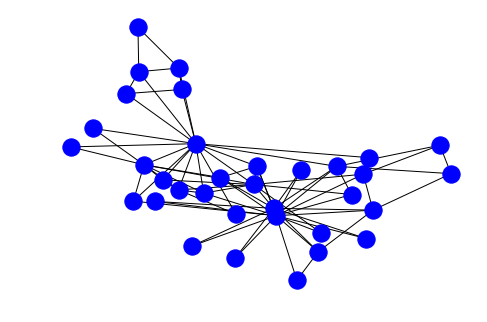

In [23]:
G = nx.karate_club_graph()
nx.draw(G,node_color="blue")
nx.edge_betweenness_centrality(G)

In [24]:
my_edge_betweenness = nx.edge_betweenness_centrality(G)
my_edge_betweenness[0, 1]
my_edge_betweenness.get((0, 1))

0.025252525252525245

In [25]:
max(my_edge_betweenness, key=my_edge_betweenness.get)
max(G.edges(), key=my_edge_betweenness.get)
my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)

In [26]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [27]:
G = nx.karate_club_graph()
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

In [28]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)
best_partition

ZeroDivisionError: float division by zero

In [ ]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

In [ ]:
nx.community.quality.modularity(G, best_partition)

In [ ]:
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

two_cluster_partition

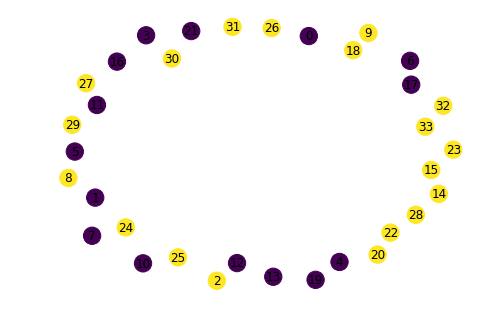

In [29]:
two_cluster_partition_map = create_partition_map(two_cluster_partition)

node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

Text(0.5,1,'Actual communities')

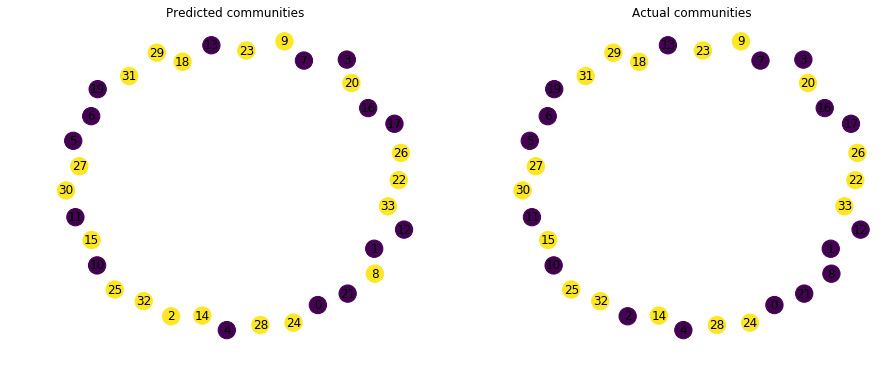

In [30]:
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')